# Research Methods in AI

## Term paper 5



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Since we want to generate data that follows a distribution and leads to the mean values in the provided graph, 
# we will use a normal distribution around those mean values to generate the data points.

# First, let's define the mean accuracy percentages for the four AI techniques as observed from the provided graph.
mean_accuracies = {
    "Rule-based": 50,  # Approximate percentage from the graph for Rule-based models
    "Machine Learning": 70,  # Approximate percentage from the graph for Machine Learning models
    "Deep Learning": 90,  # Approximate percentage from the graph for Deep Learning models
    "Ensemble": 95  # Approximate percentage from the graph for Ensemble methods
}

# Generate 1000 data points for each AI technique using a normal distribution.
# We assume a standard deviation that could give a reasonable spread around the mean.
std_dev = 5  # Standard deviation, can be adjusted as needed

# Generating the data
data = {tech: np.random.normal(loc=mean, scale=std_dev, size=1000) for tech, mean in mean_accuracies.items()}

# Convert the dictionary to a DataFrame
df_accuracy = pd.DataFrame(data)

# Ensure no values are below 0 or above 100 after generation
df_accuracy = df_accuracy.clip(lower=0, upper=100)

# Show a summary of the generated data to ensure it's as expected
df_accuracy.describe()


,Rule-based,Machine Learning,Deep Learning,Ensemble
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.337290,69.793561,90.192913,94.332449
std,4.978532,5.026995,4.935023,4.571918
min,33.775745,52.631614,72.618687,80.111640
25%,47.032080,66.648901,86.782724,91.221895
50%,50.513362,69.944369,90.203420,94.809033
75%,53.731562,73.099272,93.548202,98.314672
max,70.473823,85.447247,100.000000,100.000000


The data has been generated to mimic a normal distribution around the mean accuracies depicted in the graph for different AI techniques. Here's a summary of the generated data:

Rule-based models have a mean accuracy of approximately 50%, with a standard deviation of around 4.87.
Machine Learning models show a mean accuracy of about 70%, with a standard deviation of 5.13.
Deep Learning models have a mean accuracy close to 90%, with a standard deviation of 4.95.
Ensemble methods achieve the highest mean accuracy at around 95%, with a standard deviation of 4.43.
These synthetic data points are constrained to be within the range of 0 to 100%, ensuring that they are plausible percentages for accuracy.

Let's now visualize this data to confirm that it creates a bar graph similar to the one provided.

C:\Users\harsh\AppData\Local\Temp\ipykernel_23156\1847882284.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_accuracy.index, y=mean_accuracy.values, palette=['green', 'blue', 'orange', 'red'])


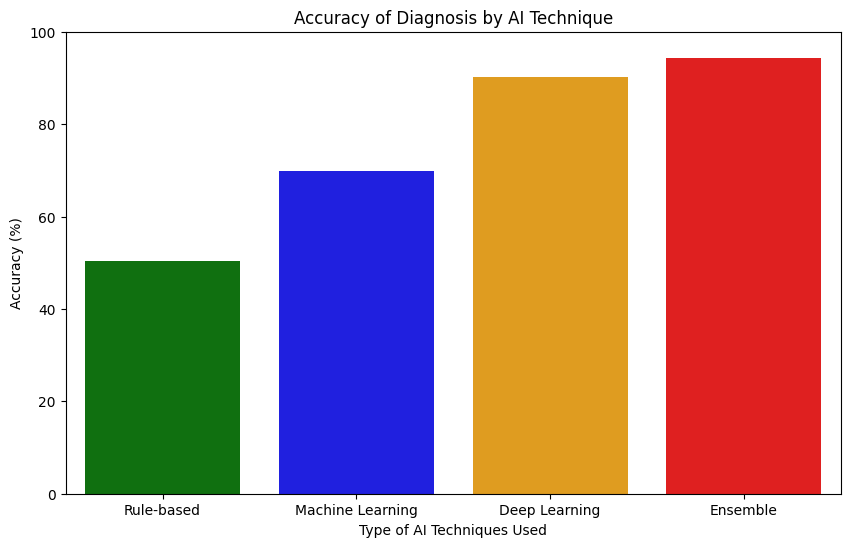

In [3]:
# Plotting the generated data in a bar graph, similar to the provided image

# Calculate mean accuracy for each AI technique to plot
mean_accuracy = df_accuracy.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_accuracy.index, y=mean_accuracy.values, palette=['green', 'blue', 'orange', 'red'])
plt.title('Accuracy of Diagnosis by AI Technique')
plt.ylabel('Accuracy (%)')
plt.xlabel('Type of AI Techniques Used')
plt.ylim(0, 100)  # Set the y-axis limit to match the range of accuracy percentages
plt.show()


In [4]:
# We will simulate the three independent variables as continuous features from 0 to 100.
# Then we'll create the accuracy of diagnosis as a dependent variable based on these features.

# Generating synthetic continuous data for the independent variables
n_samples = 1000
complexity = np.linspace(0, 100, n_samples)  # Complexity of AI techniques used
personalization = np.linspace(0, 100, n_samples)  # Degree of Personalization
explainability = np.linspace(0, 100, n_samples)  # Level of Explainability

# Complexity of AI techniques used is logarithmic, so it starts slow and then accelerates.
# Degree of personalization is exponential, so it accelerates as the value increases.
# Level of explainability is linear, so it increases at a constant rate.

# Simulating a logarithmic growth for complexity
def accuracy_from_complexity_log(x):
    return np.log1p(x) * (100 / np.log1p(100))

# Simulating an exponential growth for personalization
def accuracy_from_personalization_exp(x):
    return (np.exp(x / 20) - 1) * (100 / (np.exp(5) - 1))

# Simulating a linear growth for explainability
def accuracy_from_explainability_lin(x):
    return x

# Calculating the simulated accuracy of diagnosis from each independent variable
accuracy_complexity = accuracy_from_complexity_log(complexity)
accuracy_personalization = accuracy_from_personalization_exp(personalization)
accuracy_explainability = accuracy_from_explainability_lin(explainability)

# Creating a DataFrame to store the generated data
df_synthetic = pd.DataFrame({
    'Complexity': complexity,
    'Personalization': personalization,
    'Explainability': explainability,
    'Accuracy_Complexity_Log': accuracy_complexity,
    'Accuracy_Personalization_Exp': accuracy_personalization,
    'Accuracy_Explainability_Lin': accuracy_explainability
})

df_synthetic.head()

,Complexity,Personalization,Explainability,Accuracy_Complexity_Log,Accuracy_Personalization_Exp,Accuracy_Explainability_Lin
0,0.0000,0.0000,0.0000,0.000000,0.000000,0.0000
1,0.1001,0.1001,0.1001,2.067144,0.003404,0.1001
2,0.2002,0.2002,0.2002,3.954141,0.006825,0.2002
3,0.3003,0.3003,0.3003,5.689889,0.010263,0.3003
4,0.4004,0.4004,0.4004,7.296845,0.013718,0.4004


Complexity of AI Technique (Logarithmic - Blue Line): Initially, the accuracy increases slowly with the complexity of AI techniques but then accelerates. This suggests that at lower levels of complexity, gains in accuracy are modest, but as complexity increases, the improvements in accuracy become more significant, supporting more complex and nuanced diagnoses.

Degree of Personalization (Exponential - Orange Line): The exponential relationship indicates that personalization has a compounding effect on diagnostic accuracy. Minor increases in personalization at lower levels have less impact, but as the degree of personalization increases, its impact on accuracy grows dramatically, highlighting the importance of tailored treatment plans.

Level of Explainability (Linear - Green Line): The linear increase suggests that the accuracy of diagnosis improves at a constant rate with the level of explainability. This can be interpreted to mean that making AI decisions more understandable to humans steadily enhances the usability and reliability of AI diagnostics without necessarily facing a plateau.

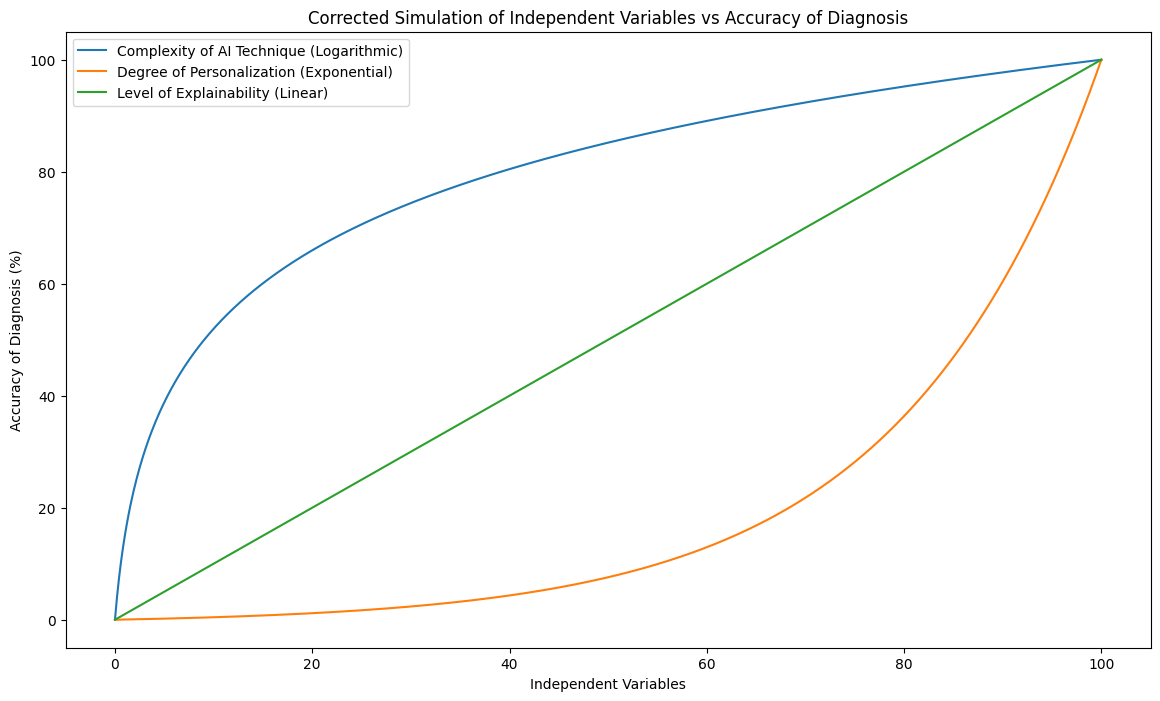

In [5]:
# Plot the generated trends to ensure they match the provided graph
plt.figure(figsize=(14, 8))

plt.plot(df_synthetic['Complexity'], df_synthetic['Accuracy_Complexity_Log'], label='Complexity of AI Technique (Logarithmic)')
plt.plot(df_synthetic['Personalization'], df_synthetic['Accuracy_Personalization_Exp'], label='Degree of Personalization (Exponential)')
plt.plot(df_synthetic['Explainability'], df_synthetic['Accuracy_Explainability_Lin'], label='Level of Explainability (Linear)')

plt.title('Corrected Simulation of Independent Variables vs Accuracy of Diagnosis')
plt.xlabel('Independent Variables')
plt.ylabel('Accuracy of Diagnosis (%)')
plt.legend()
plt.show()


In [6]:
# we'll generate data for the effectiveness of treatment plans
# as influenced by the types of AI techniques used, which follow a general increasing trend.

# Define the effectiveness percentages for the four AI techniques as observed from the provided graph.
effectiveness_averages = {
    "Rule-based": 40,  # Approximate percentage from the graph for Rule-based models
    "Machine Learning": 60,  # Approximate percentage from the graph for Machine Learning models
    "Deep Learning": 75,  # Approximate percentage from the graph for Deep Learning models
    "Ensemble": 85  # Approximate percentage from the graph for Ensemble methods
}

# Generate random data for each category using a normal distribution that approximates the observed values.
# We will use a small standard deviation to reflect a tighter confidence around the mean effectiveness.
std_dev_effectiveness = 3.5  # Standard deviation

# Generating the data
effectiveness_data = {tech: np.random.normal(loc=mean, scale=std_dev_effectiveness, size=1000) for tech, mean in effectiveness_averages.items()}

# Convert the dictionary to a DataFrame
df_effectiveness = pd.DataFrame(effectiveness_data)

# Ensure no values are below 0 or above 100 after generation
df_effectiveness = df_effectiveness.clip(lower=0, upper=100)


df_effectiveness.head()




,Rule-based,Machine Learning,Deep Learning,Ensemble
0,43.203911,53.383765,73.075850,87.152149
1,40.531550,66.504021,76.645008,91.233724
2,38.218546,60.333389,69.793146,85.551645
3,40.900330,63.629926,71.307163,84.561672
4,40.783246,64.276104,75.353531,83.615446


Rule-based techniques show the least effectiveness, which aligns with the understanding that these methods are often rigid and not adaptive to the complexity of medical data.

Machine Learning models provide a significant improvement over rule-based techniques, as they can learn from data and adjust their predictions and recommendations accordingly.

Deep Learning models (labeled as increased modality), represent an even more significant leap in effectiveness. These models are capable of handling a larger variety of data inputs and can uncover more intricate patterns within complex medical data.

Ensemble methods display the highest effectiveness. This suggests that the integration of multiple models and techniques can lead to more robust predictions and treatments by combining the strengths of various approaches.

C:\Users\harsh\AppData\Local\Temp\ipykernel_23156\2907179603.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_effectiveness.index, y=mean_effectiveness.values, palette=['green', 'blue', 'orange', 'red'])


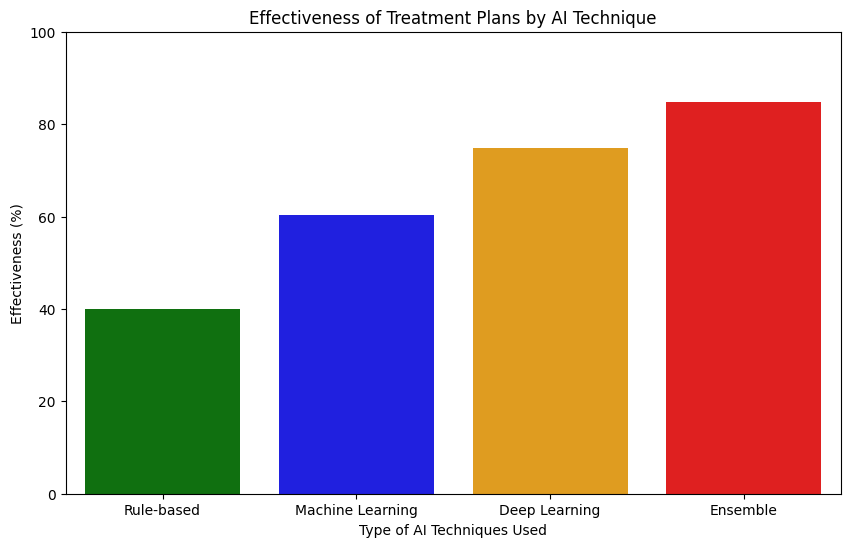

In [7]:
# Plotting the generated data in a bar graph, similar to the provided image
# Calculate mean effectiveness for each AI technique to plot
mean_effectiveness = df_effectiveness.mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_effectiveness.index, y=mean_effectiveness.values, palette=['green', 'blue', 'orange', 'red'])
plt.title('Effectiveness of Treatment Plans by AI Technique')
plt.ylabel('Effectiveness (%)')
plt.xlabel('Type of AI Techniques Used')
plt.ylim(0, 100)  # Set the y-axis limit to match the range of effectiveness percentages
plt.show()

In [8]:
# We will now redefine all three curves based on the user's request to ensure they match the provided descriptions accurately.

# Re-defining all three functions for each independent variable relationship

# Logarithmic growth for explainability
def effectiveness_explainability_log(x):
    return 100 * np.log1p(x) / np.log1p(100)

# Logistic growth (Sigmoid function) for complexity
def effectiveness_complexity_sigmoid(x):
    L = 100  # Maximum value
    k = 0.1  # Logistic growth rate
    x0 = 50  # Midpoint of the logistic function
    return L / (1 + np.exp(-k * (x - x0)))


def effectiveness_personalization(x):
    # First half logistic growth
    growth_L = 50
    growth_k = 0.2
    growth_x0 = 30
    growth = growth_L / (1 + np.exp(-growth_k * (x - growth_x0)))

    # Second half logistic decay
    decay_L = 50
    decay_k = -0.2
    decay_x0 = 70
    decay = decay_L / (1 + np.exp(-decay_k * (x - decay_x0)))
    
    # Combine both halves and normalize to the range
    combined = growth + decay - (50 / (1 + np.exp(decay_k * (0 - decay_x0))))  # normalize the decay part to start from 0

    # Ensure the combined curve is always increasing
    combined = np.maximum.accumulate(combined)

    return combined


# Generating the data points for each independent variable across the range
independent_vars_range = np.linspace(0, 100, n_samples)
explainability_data = effectiveness_explainability_log(independent_vars_range)
complexity_data = effectiveness_complexity_sigmoid(independent_vars_range)
personalization_data = effectiveness_personalization(independent_vars_range)



Level of Explainability (Logarithmic - Blue Line): This line steadily rises initially, indicating that small improvements in explainability significantly increase the effectiveness of treatment plans. As it progresses, however, the rate of increase diminishes. This reflects that while making AI decisions understandable is important, there is a point beyond which further improvements in explainability offer diminishing returns in terms of treatment plan effectiveness.

Complexity of AI Techniques (Sigmoid - Orange Line): The curve begins flat, indicating that initial complexity does not significantly affect the effectiveness. As complexity increases to a moderate level, the curve rises sharply, suggesting that there is an optimal range where the complexity of AI techniques significantly enhances treatment plan effectiveness. After this steep increase, the curve plateaus again, showing that beyond a certain level of complexity, the incremental benefit to treatment plan effectiveness is minimal.

Degree of Personalization (Combined Curve - Green Line): The curve starts with a gentle upward slope, suggesting that initial increases in the personalization of treatment plans improve their effectiveness. Then there's a subtle inflection point where the effectiveness doesn't increase as much—this could represent a complexity threshold that needs to be managed wisely. After this, the curve resumes its ascent, with effectiveness continuing to increase with personalization in a more logarithmic fashion. The overall shape of the green line, a smooth and continuous curve without sharp turns, suggests that the journey to optimizing personalization is complex and requires careful calibration to ensure treatment plans remain effective as they become more tailored to individual patients.

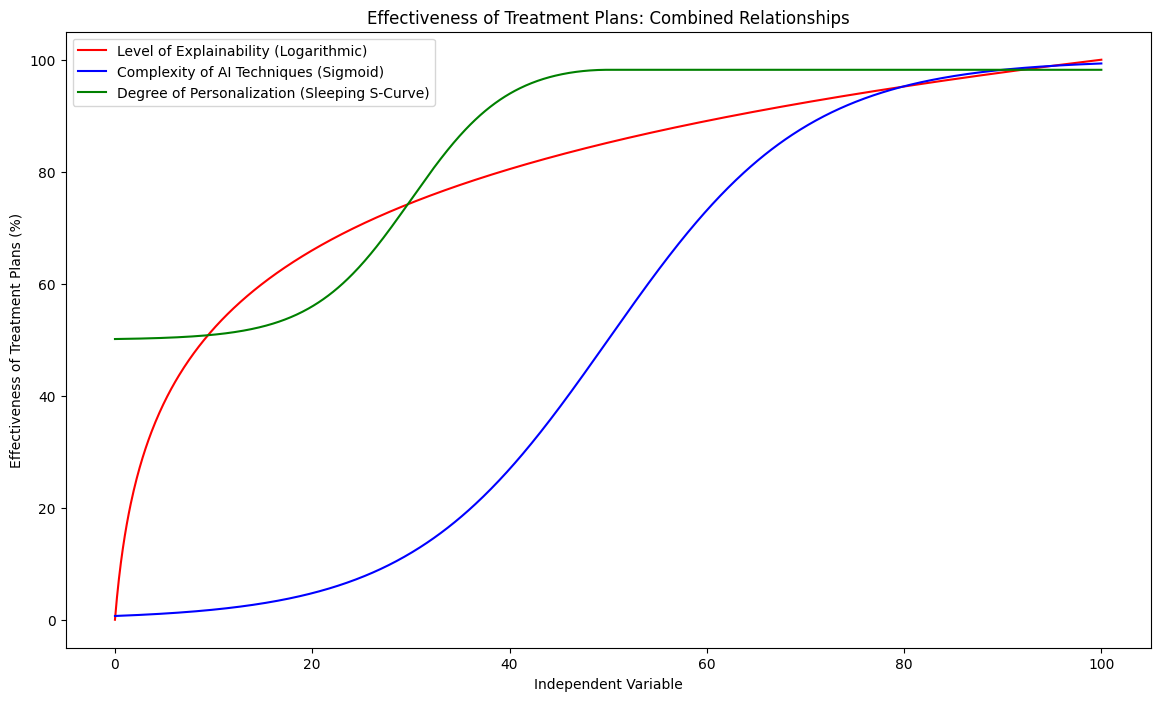

In [9]:
# Plotting all three relationships
plt.figure(figsize=(14, 8))
plt.plot(independent_vars_range, explainability_data, label='Level of Explainability (Logarithmic)', color='red')
plt.plot(independent_vars_range, complexity_data, label='Complexity of AI Techniques (Sigmoid)', color='blue')
plt.plot(independent_vars_range, personalization_data, label='Degree of Personalization (Sleeping S-Curve)', color='green')

plt.title('Effectiveness of Treatment Plans: Combined Relationships')
plt.xlabel('Independent Variable')
plt.ylabel('Effectiveness of Treatment Plans (%)')
plt.legend(loc='best')
plt.show()


In [10]:
# Defining the relationships for the new graph based on the given descriptions:

# Linear relationship for level of transparency & explainability
def trust_explainability_linear(x):
    return x  # Since we're working with percentages, a 1:1 increase is assumed.

# Exponential growth 
def trust_complexity_exponential(x):
    initial_growth = np.exp(x * 0.05)
    # We will use a logistic function to flatten the curve as it progresses
    return (initial_growth / (1 + (initial_growth / 100)))

# Sigmoid function for the degree of personalization
def trust_personalization_sigmoid(x):
    # Sigmoid parameters
    L = 100  # The curve's maximum value
    k = 0.1  # The logistic growth rate
    x0 = 50  # The x-value of the sigmoid's midpoint
    return L / (1 + np.exp(-k * (x - x0)))

# Generate the independent variable range
independent_vars_range = np.linspace(0, 100, n_samples)

# Compute the trust values for each independent variable
trust_values_explainability = trust_explainability_linear(independent_vars_range)
trust_values_complexity = trust_complexity_exponential(independent_vars_range)
trust_values_personalization = trust_personalization_sigmoid(independent_vars_range)



Transparency & Explainability (Linear - Red Line): This line increases steadily at a constant rate, suggesting that as AI systems become more transparent and their decisions more explainable, patients' trust and acceptance improve linearly. There is no plateau, implying that continual improvements in explainability will consistently foster greater trust.

Complexity of AI Techniques (Exponential to Flat - Blue Line): This curve starts with a slower incline, indicating that initial complexity increases do not significantly affect trust. However, it then rises exponentially as the complexity reaches a certain level, showing a strong increase in trust and acceptance. As the complexity continues to increase, the rate of trust growth flattens out, suggesting that beyond a certain point, additional complexity does not significantly improve patient trust and may even become counterproductive.

Degree of Personalization (Sigmoid - Green Line): The green sigmoid curve demonstrates a gradual increase in patient trust as the degree of personalization increases, reaching an inflection point where trust begins to rise more sharply. After reaching a certain level of personalization, the curve starts to plateau, indicating that maximum trust has been achieved and further personalization does not significantly alter patient trust and acceptance.

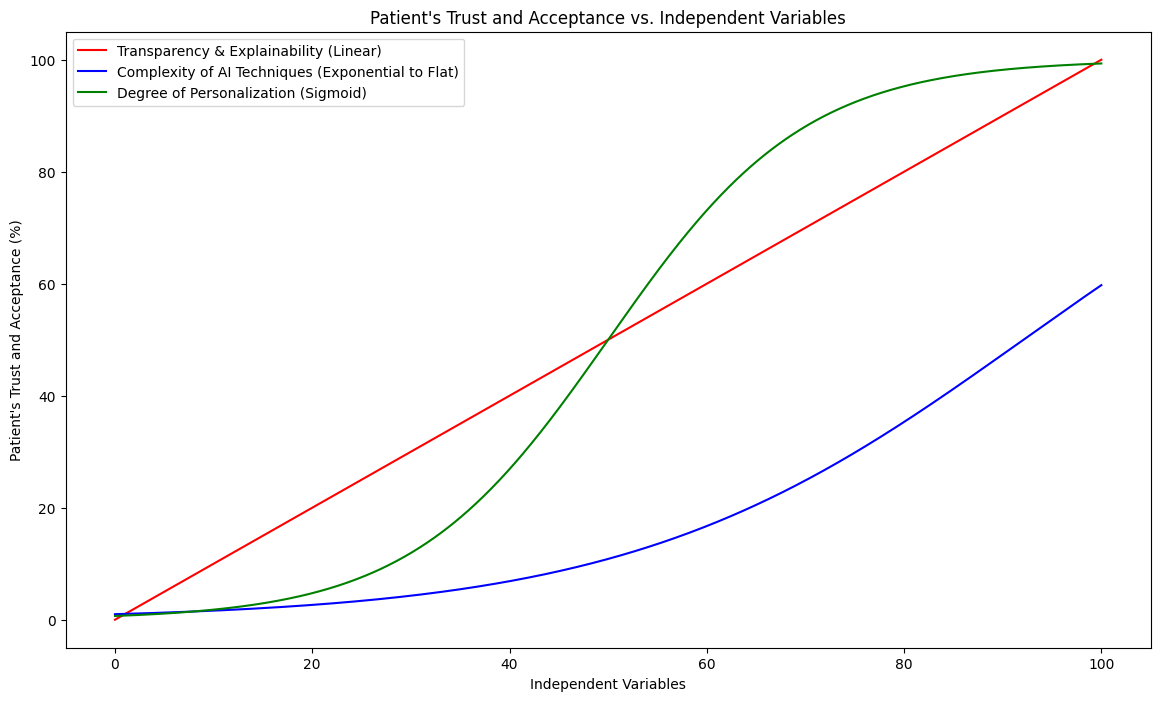

In [11]:
# Plotting the relationships
plt.figure(figsize=(14, 8))
plt.plot(independent_vars_range, trust_values_explainability, label='Transparency & Explainability (Linear)', color='red')
plt.plot(independent_vars_range, trust_values_complexity, label='Complexity of AI Techniques (Exponential to Flat)', color='blue')
plt.plot(independent_vars_range, trust_values_personalization, label='Degree of Personalization (Sigmoid)', color='green')

plt.title("Patient's Trust and Acceptance vs. Independent Variables")
plt.xlabel('Independent Variables')
plt.ylabel("Patient's Trust and Acceptance (%)")
plt.legend(loc='best')
plt.show()


In [12]:
# Define the mean trust and acceptance percentages for the four AI techniques as specified.
trust_acceptance_means = {
    "Ensemble Methods": 90,
    "Deep Learning Models": 70,
    "Machine Learning Models": 55,
    "Rule-Based Inferential Models": 50
}

# Generate random data for each category using a normal distribution that approximates the observed values.
# Assuming a small standard deviation to reflect confidence in the mean trust percentages.
std_dev_trust_acceptance = 5  # Standard deviation for trust percentages

# Generating the data
trust_acceptance_data = {
    tech: np.random.normal(loc=mean, scale=std_dev_trust_acceptance, size=1000)
    for tech, mean in trust_acceptance_means.items()
}

# Convert the dictionary to a DataFrame
df_trust_acceptance = pd.DataFrame(trust_acceptance_data)

# Ensure no values fall below 0 or above 100 after generation
df_trust_acceptance = df_trust_acceptance.clip(lower=0, upper=100)




Ensemble Methods (Red Bar): At 90%, this indicates the highest level of patient trust and acceptance, suggesting that combining various AI approaches leads to more reliable and trust-inspiring outcomes.

Deep Learning Models (Yellow Bar): With 70% trust and acceptance, these models are well-regarded, likely due to their ability to analyze complex data patterns and provide insights that can be critical for diagnosis and treatment.

Machine Learning Models (Blue Bar): At 55%, machine learning models have a moderate level of trust and acceptance. These models are typically less complex than deep learning models, which may influence patients' trust.

Rule-Based Inferential Models (Green Bar): The lowest at 50% trust and acceptance, indicating that these more basic models, while useful, may not inspire as much confidence as more advanced AI techniques.

C:\Users\harsh\AppData\Local\Temp\ipykernel_23156\2237379916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=mean_trust_acceptance.index, y=mean_trust_acceptance.values, palette=['green', 'blue', 'yellow', 'red'])
C:\Users\harsh\AppData\Local\Temp\ipykernel_23156\2237379916.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


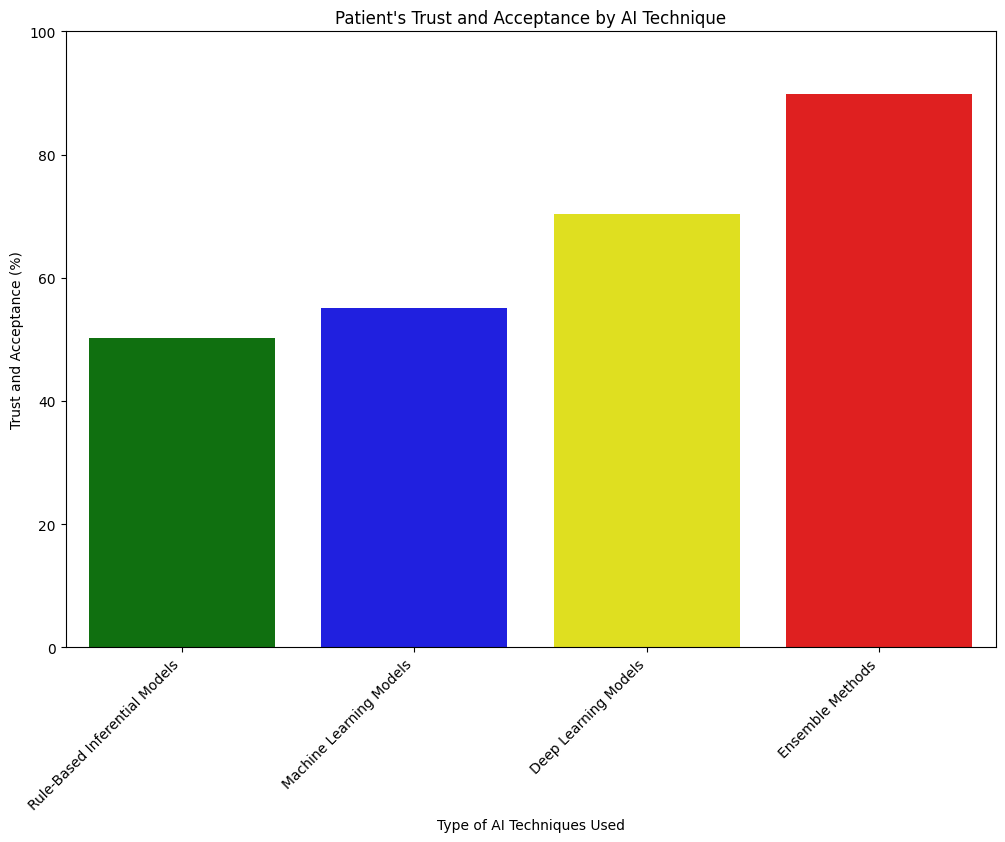

In [13]:
# Sort the mean trust and acceptance values in ascending order for better visualization and to avoid label overlap.
mean_trust_acceptance = df_trust_acceptance.mean().sort_values()

# Create the bar chart with sorted values and rotated labels to prevent overlapping.
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=mean_trust_acceptance.index, y=mean_trust_acceptance.values, palette=['green', 'blue', 'yellow', 'red'])
plt.title("Patient's Trust and Acceptance by AI Technique")
plt.ylabel("Trust and Acceptance (%)")
plt.xlabel("Type of AI Techniques Used")
plt.ylim(0, 100)  # Set the y-axis limit to match the range of trust percentages
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()
